In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/USD CHF/Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = ['Index','Timestamp','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote','Close_Bid_Quote','Volume']
    df.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

<Figure size 1440x360 with 0 Axes>

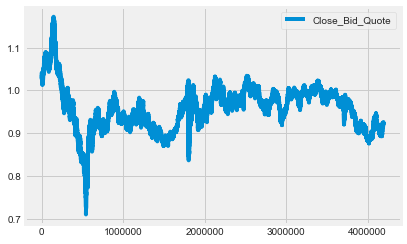

In [3]:
plt.figure(figsize=(20,5))
data.plot()

In [4]:
data.head

<bound method NDFrame.head of                    Timestamp  Close_Bid_Quote
0        2010-01-03 17:02:00          1.03670
1        2010-01-03 17:03:00          1.03660
2        2010-01-03 17:04:00          1.03690
3        2010-01-03 17:05:00          1.03670
4        2010-01-03 17:06:00          1.03670
...                      ...              ...
4194580  2021-06-30 23:52:00          0.92557
4194581  2021-06-30 23:55:00          0.92564
4194582  2021-06-30 23:56:00          0.92558
4194583  2021-06-30 23:57:00          0.92550
4194584  2021-06-30 23:58:00          0.92555

[4194585 rows x 2 columns]>

In [5]:
data['Timestamp'].min()

'2010-01-03 17:02:00'

In [6]:
data['Timestamp'].max()

'2021-06-30 23:58:00'

In [7]:
from datetime import datetime                                              
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

In [8]:
data = data.resample("D").max()

In [9]:
data.columns

Index(['Close_Bid_Quote'], dtype='object')

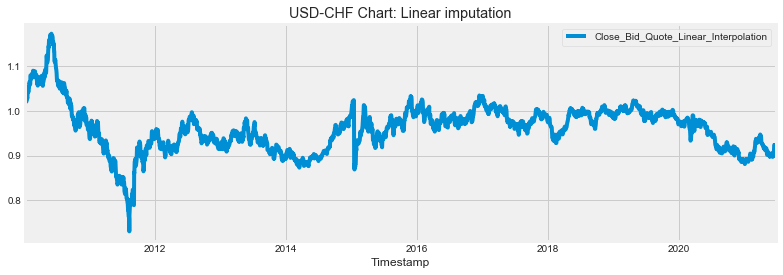

In [10]:
data = data.assign(Close_Bid_Quote_Linear_Interpolation=data.Close_Bid_Quote.interpolate(method='linear'))
data[['Close_Bid_Quote_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('USD-CHF Chart: Linear imputation')
plt.show(block=False)

In [11]:
data.drop(columns=['Close_Bid_Quote'],inplace=True)

In [12]:
data=data.rename(columns={"Close_Bid_Quote_Linear_Interpolation": "Close_Bid_Quote"}, errors="raise")

In [13]:
data.head()

,Close_Bid_Quote
Timestamp,
2010-01-03,1.0395
2010-01-04,1.0417
2010-01-05,1.0356
2010-01-06,1.0375
2010-01-07,1.0367


In [14]:
train_len = int(len(data['Close_Bid_Quote'])*80/100)
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24

In [15]:
len(test)

840

In [16]:
len(train)

3357

In [17]:
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

3358

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.69927536],
       [0.70425725],
       [0.69044384],
       ...,
       [0.43186141],
       [0.43566576],
       [0.44266304]])

In [19]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets

In [20]:
# Create the training data set 
# Create the scaled training data set

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.69927536, 0.70425725, 0.69044384, 0.69474638, 0.69293478,
       0.69633152, 0.6801404 , 0.66394928, 0.65647645, 0.65602355,
       0.65828804, 0.66576087, 0.67391304, 0.67459239, 0.67527174,
       0.671875  , 0.69723732, 0.71422101, 0.72146739, 0.71014493,
       0.70731431, 0.7044837 , 0.71014493, 0.72056159, 0.73369565,
       0.73256341, 0.75430254, 0.75260417, 0.7509058 , 0.7486413 ,
       0.74388587, 0.74592391, 0.78872283, 0.78940217, 0.78679801,
       0.78419384, 0.78328804, 0.77264493, 0.77241848, 0.78645833,
       0.79664855, 0.79189312, 0.78713768, 0.79098732, 0.78125   ,
       0.79325181, 0.81046196, 0.81272645, 0.79857337, 0.78442029,
       0.78781703, 0.80140399, 0.80842391, 0.80797101, 0.79008152,
       0.78589221, 0.7817029 , 0.80638587, 0.80955616, 0.78238225])]
[0.7887228260869568]

[array([0.69927536, 0.70425725, 0.69044384, 0.69474638, 0.69293478,
       0.69633152, 0.6801404 , 0.66394928, 0.65647645, 0.65602355,
       0.65828804, 0.66576087, 0.673

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
104/104 [==============================] - 15s 83ms/step - loss: 0.0268
Epoch 2/10
104/104 [==============================] - 9s 84ms/step - loss: 7.1638e-04: 1s - loss: 7.1182e- - ETA: 1s - loss: 7.1245e- - ETA: 0s - loss:
Epoch 3/10
104/104 [==============================] - 9s 86ms/step - loss: 7.2060e-04: 4s
Epoch 4/10
104/104 [==============================] - 9s 84ms/step - loss: 6.2501e-04
Epoch 5/10
104/104 [==============================] - 9s 85ms/step - loss: 4.8987e-04
Epoch 6/10
104/104 [==============================] - 9s 85ms/step - loss: 6.3463e-04
Epoch 7/10
104/104 [==============================] - 9s 84ms/step - loss: 4.8771e-04
Epoch 8/10
104/104 [==============================] - 9s 86ms/step - loss: 6.1252e-04
Epoch 9/10
104/104 [==============================] - 9s 84ms/step - loss: 4.4832e-04
Epoch 10/10
104/104 [==============================] - 9s 87ms/step - loss: 3.5742e-04


In [22]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.007103468342896444

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


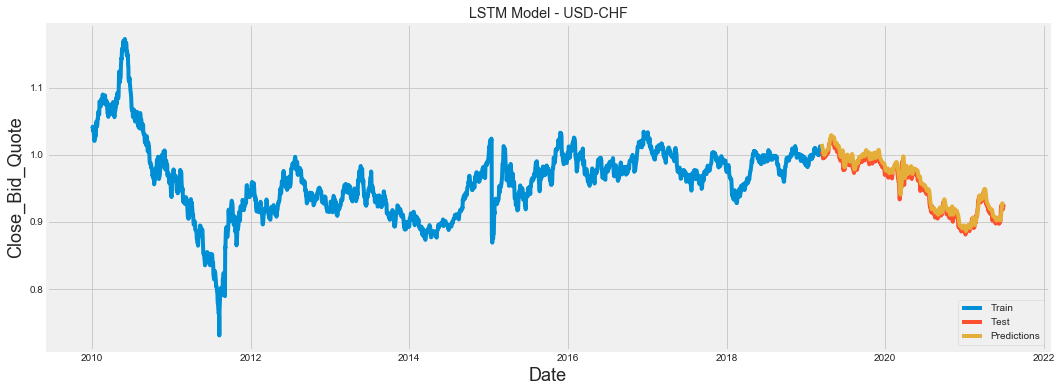

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model - USD-CHF')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Bid_Quote', fontsize=18)
plt.plot(train['Close_Bid_Quote'])
plt.plot(valid[['Close_Bid_Quote', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [24]:
# Show the valid and predicted prices
valid

,Close_Bid_Quote,Predictions
Timestamp,,
2019-03-15,1.00513,1.015927
2019-03-16,1.00377,1.014420
2019-03-17,1.00241,1.012695
2019-03-18,1.00195,1.010876
2019-03-19,1.00087,1.009219
...,...,...
2021-06-26,0.91855,0.926372
2021-06-27,0.91887,0.925215
2021-06-28,0.92141,0.924141
